#Exercise 1

Goal: Implement and verify a polynomial regression (degree 4) pipeline on Position_Salaries.csv

##Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


##Creating the matrix of features

In [5]:
X = dataset.iloc[:, 1:-1].values

In [6]:
X.shape

(10, 1)

In [7]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


##Creating the dependent variable vector

In [8]:
y = dataset.iloc[:, -1].values

In [9]:
y.shape

(10,)

In [10]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


##Creating a new matrix of features

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

In [12]:
X_poly.shape

(10, 5)

In [13]:
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


##Building the model

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

##Training the model

In [15]:
regressor.fit(X_poly, y)

LinearRegression()

##Visualizing the results

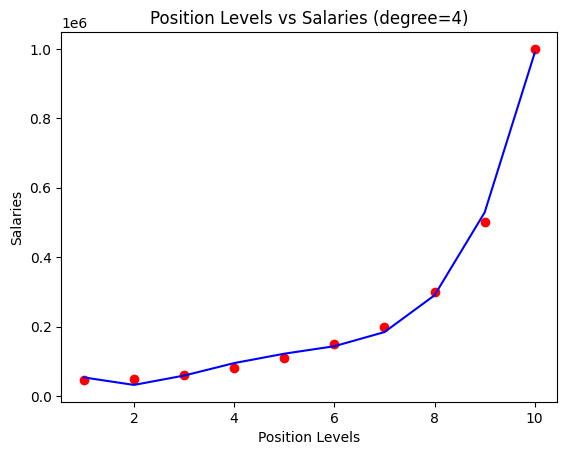

In [16]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X_poly), color='blue')
plt.title('Position Levels vs Salaries (degree=4)')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.show()

##Making a single prediction

In [17]:
pred_6_5 = regressor.predict(poly_reg.transform([[6.5]]))

In [18]:
print(pred_6_5)

[158862.45265155]


##Calculating the values of the coefficients

###Calculating b<sub>0</sub> (y-intercept)

In [19]:
print(regressor.intercept_)

184166.66666719783


###Calculating b<sub>i</sub> (slope coefficients)

In [20]:
print(regressor.coef_)

[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
